In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
file = input('Enter the image name: ')
img = Image.open(file)
img = np.asarray(img).astype('int64')

Enter the image name:  images.jpg


In [3]:
R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]

avgimg = (R+G+B)//3
H, W = np.shape(avgimg)

## Histogram generating Function

In [4]:
def Histogram(I, img_type=''):
    fig, ax = plt.subplots(3, 1, figsize=(6, 10))
    fig.tight_layout(h_pad=3)
    channels = ['red', 'green', 'blue']
    hist = []
    for c in range(0, 3):
        y, x = np.histogram(I[:,:,c], bins=256, range=(0, 256))
        y = np.insert(y, 0, 0)
        hist.append(y)
        
        ax[c].bar(x, y, color=channels[c])
        ax[c].set_title(str(img_type) + ' Histogram of ' + str(channels[c] + ' Channel'), color=channels[c])
        ax[c].set_ylabel('Frequency')
    plt.xlabel('Pixels Intensity')
    plt.show()
    return hist

## CDF generating Function

In [5]:
def CDF(I, histogram, img_type=''):
    fig, ax = plt.subplots(3, 2, figsize=(15, 10))
    plt.suptitle('CDF and Normalised CDF with' + str(img_type) + ' Histogram of each channel', fontsize=20)
    channels = ['red', 'green', 'blue']
    cdf, norm_cdf = [], []
    for c in range(0, 3):
        s = np.zeros(257, dtype=float)
        s[0] = histogram[c][0]
        for i in range(1, 257):
            s[i] = s[i-1] + histogram[c][i]
        cdf.append(s)

        # Normalising the CDF with Histogram
        norm_cdf.append(max(histogram[c])*((cdf[c]-min(cdf[c]))/(max(cdf[c])-min(cdf[c]))))
    
    for i in range(0, 3):
            ax[i, 0].plot(cdf[i], color=channels[i])
            ax[i, 0].fill_between(range(257), cdf[i], facecolor=channels[i], alpha=0.3)
            ax[i, 1].plot(norm_cdf[i], color='black')
            ax[i, 1].bar(range(257), histogram[i], color=channels[i])
            ax[i, 0].set_title('CDF of ' +  str(img_type) + str(channels[i]+' Channel'), color=channels[i])
            ax[i, 1].set_title('Normalised CDF with' + str(img_type) + ' Histogram of ' + str(channels[i]+' Channel'), color=channels[i])
            ax[i, 0].set_ylabel('Cummulative Frequency')
            ax[i, 0].set_xlabel('Pixel Intensity')
            ax[i, 1].set_xlabel('Pixel Intensity')

    plt.subplots_adjust(bottom=0.1, hspace=0.4)
    plt.show()
    return cdf

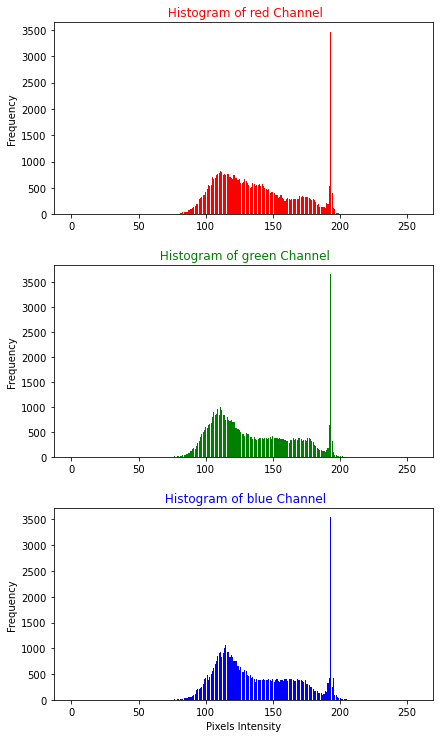

In [6]:
hist = Histogram(img)

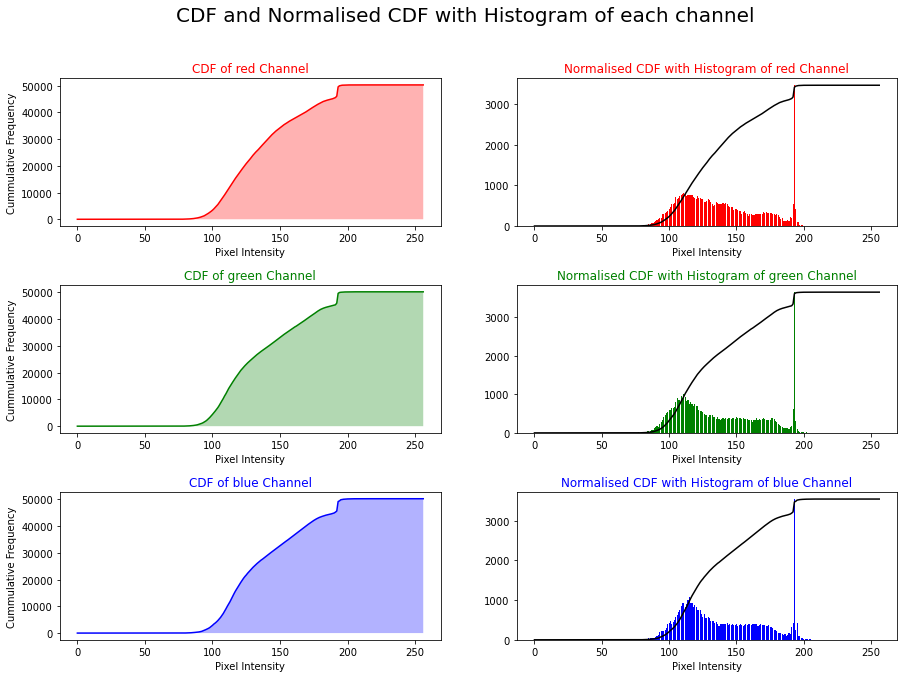

In [7]:
cdf = CDF(img, hist)

## Transformation To Uniform(0, 256)

In [8]:
maps = []
for c in range(0, 3):
    m = np.zeros(257, dtype=int)
    for i in range(hist[c].size):
        m[i] = max(0, round((256*cdf[c][i])/(H*W))-1)
    maps.append(m)

In [9]:
new_img = img.copy()
for c in range(0, 3):
    channel = np.zeros(img[:,:,c].size, dtype=int)
    temp = img[:,:,c].flatten()
    for i in range(0, img[:,:,c].size):
        channel[i] = maps[c][temp[i]]
    new_img[:,:,c] = np.reshape(channel, (H,W))

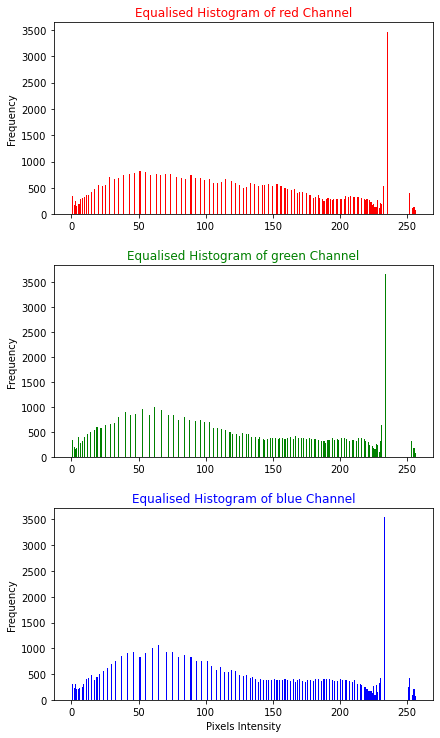

In [10]:
new_hist = Histogram(new_img, 'Equalised')

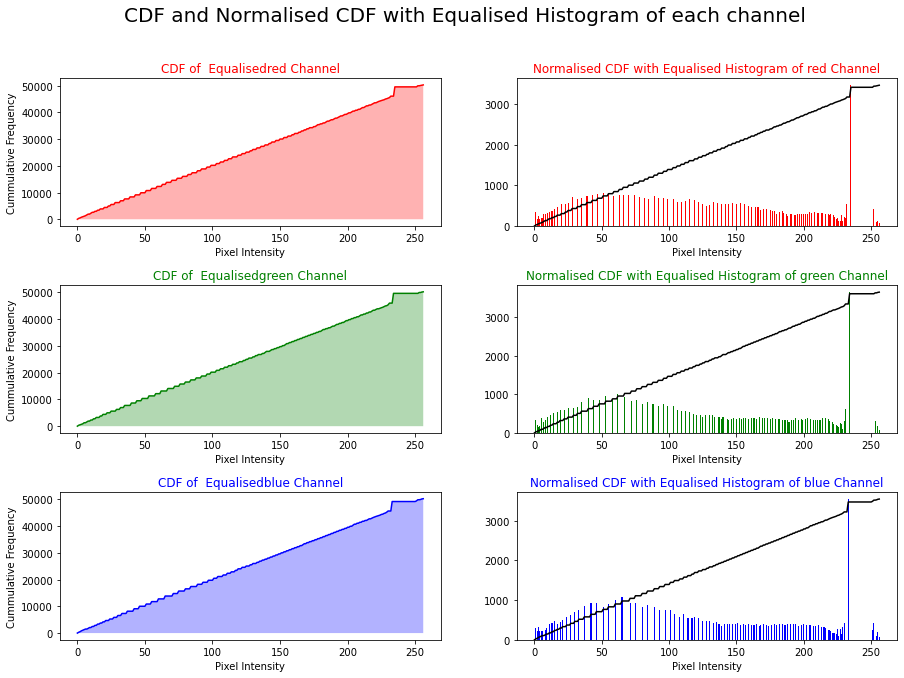

In [11]:
new_cdf = CDF(new_img, new_hist, ' Equalised')

In [12]:
new_img = new_img.astype('uint8')

In [13]:
EqualisedImg = Image.fromarray(new_img)

In [14]:
out = str('Equalised_' + file)
EqualisedImg.save(out)